In [1]:
using CSV,Plots,Statistics,StatsBase, DataFrames, DelimitedFiles
gr()

Plots.GRBackend()

In [2]:
data = CSV.File("SlippiStat2.csv") |> DataFrame

#shift character by 1 so it's 1-indexed
data[!,:p1Character].+=1
data[!,:p2Character].+=1

#filtering unfinished games and buged characters
games = select!(data[.!(data.lraStart), :], Not(:lraStart))
games = games[games.p1Character.<27, :]
games = games[games.p2Character.<27, :]

#info for players win rate & stuff
characters = ["Captain Falcon", "Donkey Kong", "Fox", "Mr. Game & Watch", "Kirby",
            "Bowser", "Link", "Luigi", "Mario", "Marth", "Mewtwo", "Ness", "Peach",
            "Pikachu", "Ice Climbers", "Jigglypuff", "Samus", "Yoshi", "Zelda",
            "Sheik", "Falco", "Young Link", "Dr. Mario", "Roy", "Pichu", "Ganondorf"]

winners = [games[games.win.==1, :][!,:p1Code];games[games.win.==2, :][!,:p2Code]]
allPlayers = [games[!,:p1Code];games[!,:p2Code]]
players= allPlayers ∪ []

cmWins = countmap(winners)
cmPlays = countmap(allPlayers);

In [13]:
#def of a good player
goodPlayer(p,cmWin,cmGame) = get(cmWin,p,0)/cmGame[p]>0.50 && get(cmWin,p,0)/cmGame[p] < 1

#filtering for good players
games = games[goodPlayer.(games.p2Code,[cmWins],[cmPlays]), :]
games = games[goodPlayer.(games.p1Code,[cmWins],[cmPlays]), :]

,win,p1Code,p1Character,p2Code,p2Character,numFrames
,Int64,String,Int64,String,Int64,Int64
1,2,YAX#382,7,SCOT#864,3,10056
2,1,SCOT#864,3,FLSH#782,10,12636
3,1,SCOT#864,3,FLSH#782,21,11938
4,2,SCOT#864,3,FLSH#782,21,7292
5,1,SCOT#864,1,CAPT#215,22,11141
6,2,XTC#533,14,SCOT#864,3,6921
7,1,KOTO#245,1,SCOT#864,3,8254
8,2,SCOT#864,3,PETE#653,21,11478
9,1,SCOT#864,3,PETE#653,21,14157


In [14]:
#sanity check, should be ≈ 1.5
mean(games[!,:win])

1.500759890386796

In [15]:
counts=values(sort(countmap([games[!,:p1Character];games[!,:p2Character]])));
relcounts=counts./sum(counts);
#writedlm( "communityDistribution.csv",  relcounts, ',')

┌ Warning: `sort(d::Dict; args...)` is deprecated, use `sort!(OrderedDict(d); args...)` instead.
│   caller = top-level scope at In[15]:1
└ @ Core In[15]:1


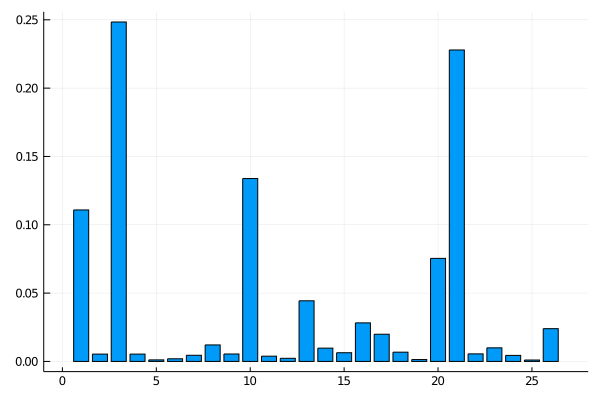

In [20]:
bar(relcounts,legend=false)

In [17]:
function matchupchart(data::DataFrame)
    p1 = :p1Character
    p2 = :p2Character
   
    M = zeros(26,26)
    counts = zeros(26,26)
    
    winners = [data[data.win.==1, :][!,:p1Character];data[data.win.==2, :][!,:p2Character]]
    losers = [data[data.win.==1, :][!,:p2Character];data[data.win.==2, :][!,:p1Character]]
    
    for (i,j) in zip(winners,losers)
        M[i,j] += 1
        counts[i,j] += 1
        counts[j,i] += 1
    end

    
    M ./counts,counts
end

matchupchart (generic function with 1 method)

In [18]:
mc,a = matchupchart(games)

([0.5 0.5213675213675214 … 0.6170212765957447 0.46873102610807527; 0.47863247863247865 0.5 … 0.625 0.4125; … ; 0.3829787234042553 0.375 … 0.5 0.1111111111111111; 0.5312689738919247 0.5875 … 0.8888888888888888 0.5], [8674.0 351.0 … 47.0 1647.0; 351.0 86.0 … 16.0 80.0; … ; 47.0 16.0 … 70.0 18.0; 1647.0 80.0 … 18.0 2096.0])

In [7]:
writedlm( "mcMeleeModel.csv",  mc, ',')

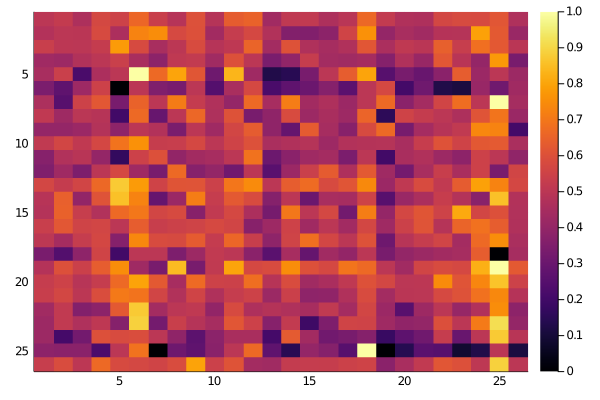

In [19]:
#heatmap(characters,characters,mc,yflip=true)
heatmap(mc,yflip=true)

In [60]:
collect(zip(charnoZ,mean.(mc2[x,:] for x in 1:25)))

25-element Array{Tuple{String,Float64},1}:
 ("Captain Falcon", 0.5512185039485848)
 ("Donkey Kong", 0.5293954450385092)
 ("Fox", 0.5491289674086258)
 ("Mr. Game & Watch", 0.4836925555610032)
 ("Kirby", 0.45676019522478617)
 ("Bowser", 0.3242917583530804)
 ("Link", 0.5357498289386488)
 ("Luigi", 0.49172339613513366)
 ("Mario", 0.46915630756094356)
 ("Marth", 0.5407792880648958)
 ("Mewtwo", 0.41996705840636933)
 ("Ness", 0.42299958085559863)
 ("Peach", 0.6422354858725292)
 ("Pikachu", 0.5279181692742775)
 ("Ice Climbers", 0.5729446780729932)
 ("Jigglypuff", 0.5336139648887602)
 ("Samus", 0.5525343502144926)
 ("Yoshi", 0.41072790950395643)
 ("Sheik", 0.5898975658130508)
 ("Falco", 0.542485758973164)
 ("Young Link", 0.4760782821024123)
 ("Dr. Mario", 0.5230350370199714)
 ("Roy", 0.43578695099653514)
 ("Pichu", 0.3523870730616009)
 ("Ganondorf", 0.5654918887100773)

In [17]:
#peach matchup
p = ["peach" for i in 1:26]
[p mc[13,:] characters mc[:,13]]

26×4 Array{Any,2}:
 "peach"  0.565613  "Captain Falcon"    0.434387
 "peach"  0.52459   "Donkey Kong"       0.47541
 "peach"  0.560773  "Fox"               0.439227
 "peach"  0.664     "Mr. Game & Watch"  0.336
 "peach"  0.875     "Kirby"             0.125
 "peach"  0.78125   "Bowser"            0.21875
 "peach"  0.55102   "Link"              0.44898
 "peach"  0.611842  "Luigi"             0.388158
 "peach"  0.611111  "Mario"             0.388889
 "peach"  0.542868  "Marth"             0.457132
 "peach"  0.696629  "Mewtwo"            0.303371
 "peach"  0.745763  "Ness"              0.254237
 "peach"  0.5       "Peach"             0.5
 "peach"  0.636872  "Pikachu"           0.363128
 "peach"  0.671429  "Ice Climbers"      0.328571
 "peach"  0.578231  "Jigglypuff"        0.421769
 "peach"  0.613636  "Samus"             0.386364
 "peach"  0.742331  "Yoshi"             0.257669
 "peach"  0.416667  "Zelda"             0.583333
 "peach"  0.511462  "Sheik"             0.488538
 "peach"  0.582

In [59]:
charnoZ=characters[[1:18...]∪[20:26...]]

25-element Array{String,1}:
 "Captain Falcon"
 "Donkey Kong"
 "Fox"
 "Mr. Game & Watch"
 "Kirby"
 "Bowser"
 "Link"
 "Luigi"
 "Mario"
 "Marth"
 "Mewtwo"
 "Ness"
 "Peach"
 "Pikachu"
 "Ice Climbers"
 "Jigglypuff"
 "Samus"
 "Yoshi"
 "Sheik"
 "Falco"
 "Young Link"
 "Dr. Mario"
 "Roy"
 "Pichu"
 "Ganondorf"

In [22]:
writedlm( "character.csv",  characters, ',')

26×2 Array{Any,2}:
  1  "Captain Falcon"
  2  "Donkey Kong"
  3  "Fox"
  4  "Mr. Game & Watch"
  5  "Kirby"
  6  "Bowser"
  7  "Link"
  8  "Luigi"
  9  "Mario"
 10  "Marth"
 11  "Mewtwo"
 12  "Ness"
 13  "Peach"
 14  "Pikachu"
 15  "Ice Climbers"
 16  "Jigglypuff"
 17  "Samus"
 18  "Yoshi"
 19  "Zelda"
 20  "Sheik"
 21  "Falco"
 22  "Young Link"
 23  "Dr. Mario"
 24  "Roy"
 25  "Pichu"
 26  "Ganondorf"